Ici on va retrouver le code présent dans le fichier "AI_FVT.py" 

On va pouvoir modifier se fichier pour qu'il affiche 5 images aléatoire, et qu'il affiche sa prédiction (généré grace au code juste en dessous), ainsi l'utilisateur pourra voir un résultat un peu plus parlant.

In [3]:
import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '../train',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    seed=42, 
    subset='training',
    shuffle=True
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '../val',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    seed=42, 
    subset='validation',
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '../test',
    batch_size=32,
    image_size=(224, 224)
)

train_data = train_data.prefetch(buffer_size=32)
val_data = val_data.prefetch(buffer_size=32)
test_data = test_data.prefetch(buffer_size=32)

model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,10)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 16 files belonging to 2 classes.
Using 3 files for validation.
Found 624 files belonging to 2 classes.
Epoch 1/10
131/131 [==============================] - 182s 1s/step - loss: 0.2761 - accuracy: 0.8850 - val_loss: 0.2519 - val_accuracy: 1.0000
Epoch 2/10
131/131 [==============================] - 204s 2s/step - loss: 0.1128 - accuracy: 0.9571 - val_loss: 0.1085 - val_accuracy: 1.0000
Epoch 3/10
131/131 [==============================] - 207s 2s/step - loss: 0.0876 - accuracy: 0.9674 - val_loss: 0.4945 - val_accuracy: 0.6667
Epoch 4/10
131/131 [==============================] - 207s 2s/step - loss: 0.0695 - accuracy: 0.9763 - val_loss: 0.2385 - val_accuracy: 1.0000
Epoch 5/10
131/131 [==============================] - 199s 1s/step - loss: 0.0556 - accuracy: 0.9803 - val_loss: 0.0761 - val_accuracy: 1.0000
Epoch 6/10
131/131 [==============================] - 209s 2s/step - loss: 0.0449 - accuracy: 0.9847 - v

Tout d'abord petite explication des nouveau import qu'on utilise en haut :
  - random : bibliothéque pour la gestion de nombre aléatoire 
  - os : bibliotheque pour la gestion de fichier/répertoire 
  - numpy : bibliothéque pour le calcul 

Maitnenant le code  : 
  - `test_dir` : obtient le chemin vers le dossier contenant les images de test 
  - `tf.data.Dataset.list_files` : dataset contenant le nom des images 
  - `os.path.basename` : permet d'obtenir le nom des images sans le chemin 

et enfin la boucle `for` permet d'obtenir 5 images et de les affiché :
  - `prediction` : permet d'avoir le résultat (poumons malades | poumons sains) en fonction de L'IA qui renvoie sont accurency qui est soit <0.5 soit >0.5
  - `axs[i].set_title(f"{prediction} \n {test_filename}")` : permet d'afficher la prediction suivie du nom de l'image se qui permet de voir si l'IA à eu bon 

1/1 [==============================] - 0s 212ms/step


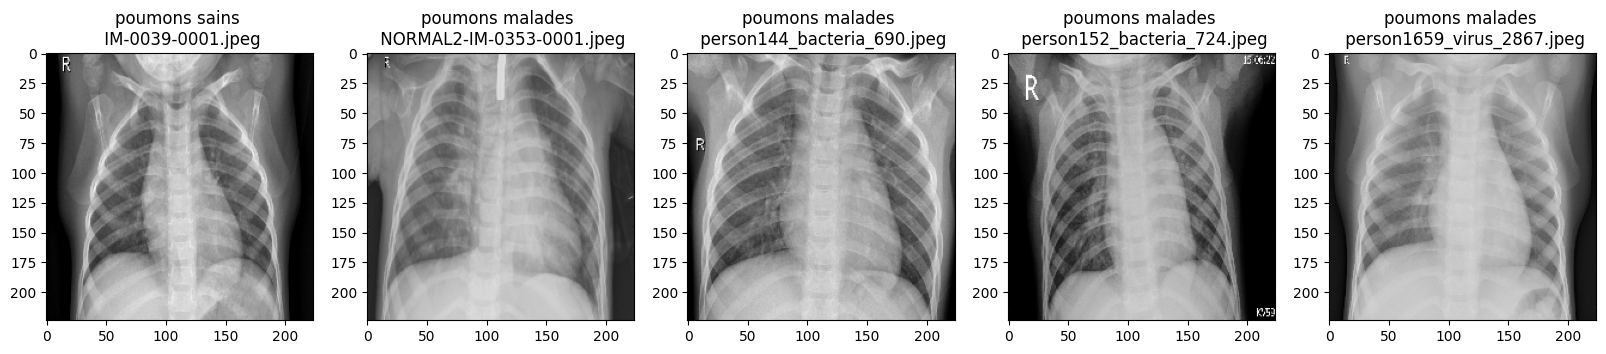

In [4]:
test_dir = '../test'
test_filenames = tf.data.Dataset.list_files(os.path.join(test_dir, '*/*'))
test_filenames = list(test_filenames)
test_filenames = [os.path.basename(file.numpy()).decode('utf-8') for file in test_filenames]

# Sélectionne une image aléatoire du jeu de données de test
test_images = np.concatenate([x for x, y in test_data], axis=0)
test_labels = np.concatenate([y for x, y in test_data], axis=0)

# Sélectionne et affiche 5 images aléatoires du jeu de données de test
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_index = random.randint(0, len(test_images) - 1)
    test_filename = test_filenames[random_index]
    test_image = test_images[random_index]
    test_label = test_labels[random_index]
    test_image_norm = test_image / 255.0
    predictions = model.predict(np.array([test_image]))
    prediction = "poumons malades" if predictions[0][0] > 0.5 else "poumons sains"
    axs[i].imshow(test_image_norm, cmap="gray")
    axs[i].set_title(f"{prediction} \n {test_filename}")
plt.show()
